In [31]:
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import AnchoredText

import regress_with_conf_interval as re

In [32]:
filename = r'./data/codeword_length_data/n_36/elapseTime.csv' 
df = pd.read_csv(filename)
type(df)

pandas.core.frame.DataFrame

In [33]:
for idx, elapsed_time in enumerate(df.elapsed_time):
    #print("Elasped time : ", elapsed_time)
    if elapsed_time.find('h') != -1:
        hour, elapsed_time = elapsed_time.split('h')
    else:
        hour = 0.0

    if elapsed_time.find('m') != -1 and elapsed_time.find('ms') == -1:
        minute, elapsed_time = elapsed_time.split('m')
    else:
        minute = 0.0

    if elapsed_time.find('s') != -1 and elapsed_time.find('ms') == -1:
        second, elapsed_time = elapsed_time.split('s')
    else:   
        second = 0.0

    if elapsed_time.find('ms') != -1:
        ms, elapsed_time = elapsed_time.split('ms')
    else:
        ms = 0.0
    
    # print("hour : ", float(hour))
    # print("minute : ", float(minute))
    # print("second : ", float(second))
    # print("ms : ", float(ms))

    df.elapsed_time[idx] = str(float(hour) * 3600 + float(minute) * 60 + float(second) + float(ms) / 100)

In [34]:
# Check conversion
x = df['block_height']
y = df['elapsed_time']

frame = pd.Series(y, index=list(x - 1))
frame

0        12.318195321
1         28.80444866
2        62.449133401
3        45.557767749
4       181.556405891
            ...      
1915      4.521544051
1916     49.961202672
1917      1.817282458
1918      1.247542553
1919      2.061749239
Name: elapsed_time, Length: 1920, dtype: object

In [63]:
#data_interval = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
data_interval = [100, 200, 300, 400, 500, 600,700,800]
data_interval[-1]

800

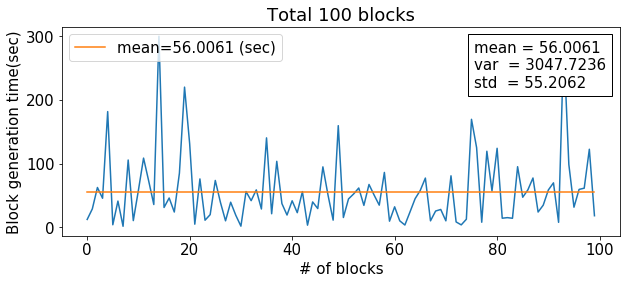

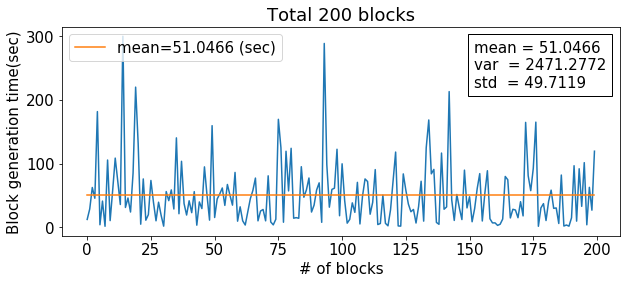

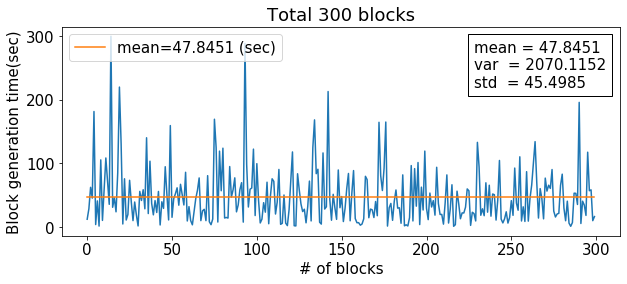

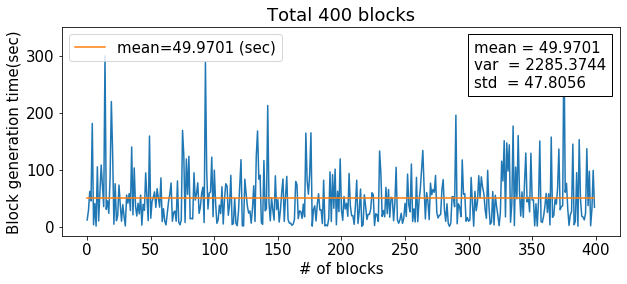

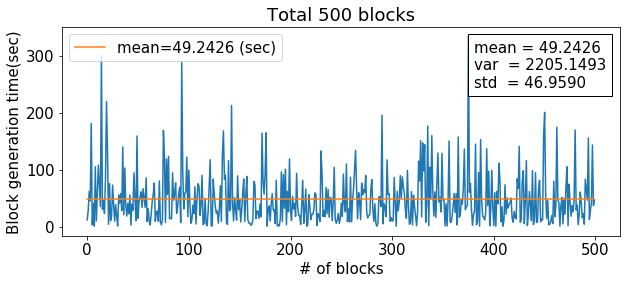

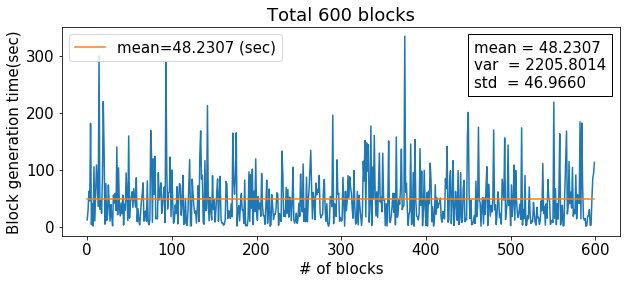

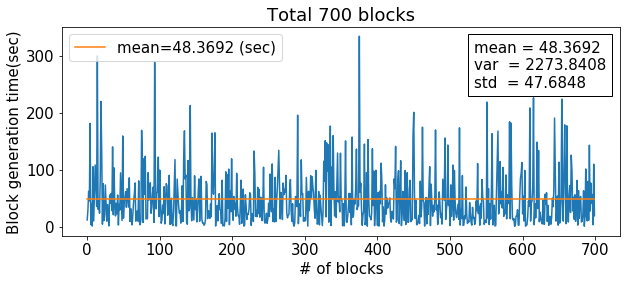

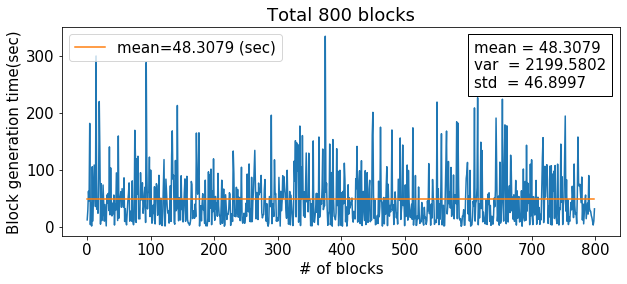

In [64]:
# Plot data
plt.rcParams["figure.figsize"] = (10,50)
mean_list = []
for i, val in enumerate(data_interval):
    x = df['block_height'][:val]
    frame = df['elapsed_time'][:val].astype(float)
    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)    
    mean = pd.Series(frame.mean(), index=list(x))
    

    ax.set_title(f"Total {val} blocks")
    ax.set_xlabel("# of blocks")
    ax.set_ylabel("Block generation time(sec)")
    ax.plot(frame)
    ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    
    textstr = '\n'.join((
        r'mean = %.4f' % (frame.mean()),
        r'var  = %.4f' % (frame.var()),
        r'std  = %.4f' % (frame.std()))
    )
    mean_list.append(frame.mean().astype(float))
    textbox = AnchoredText(textstr, loc=1)
    ax.add_artist(textbox)

    plt.legend(loc="upper left")

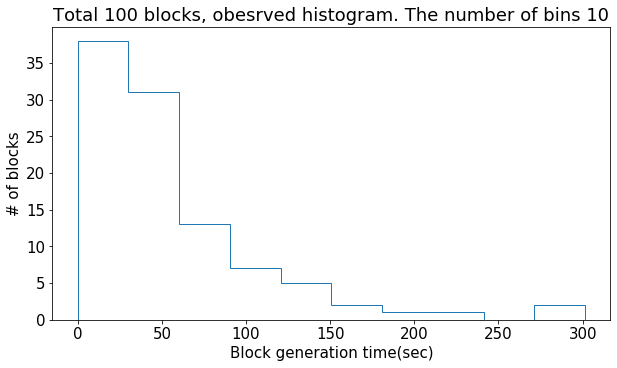

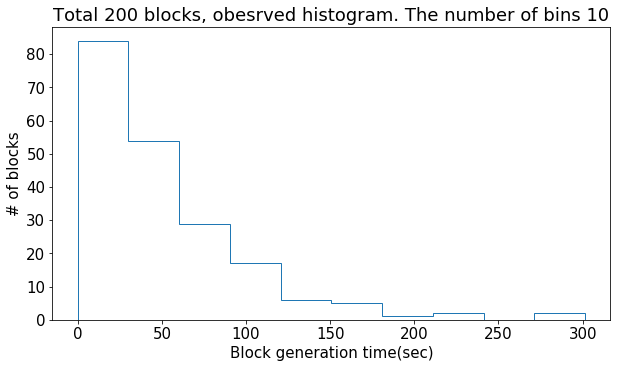

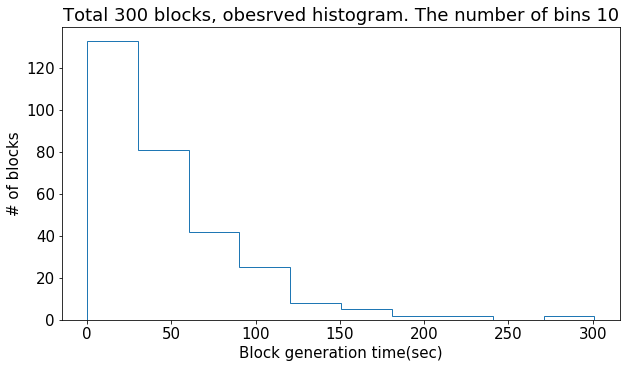

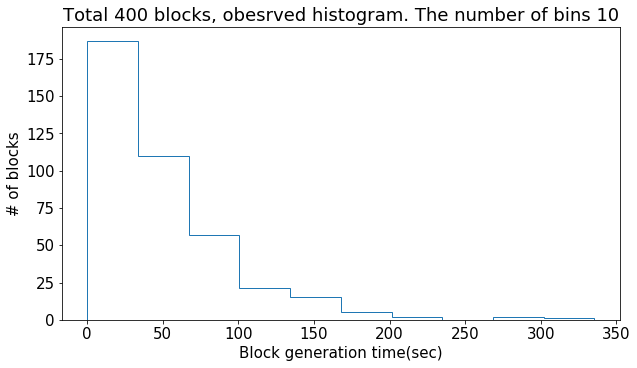

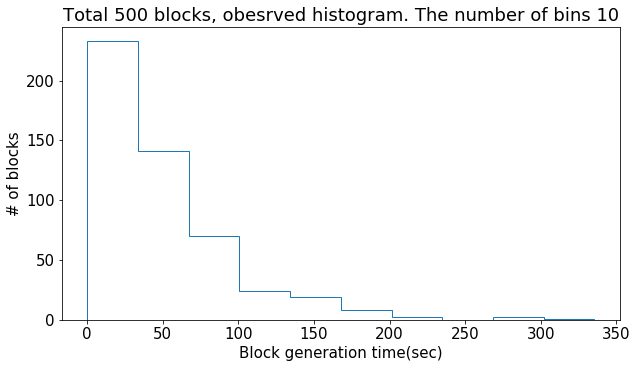

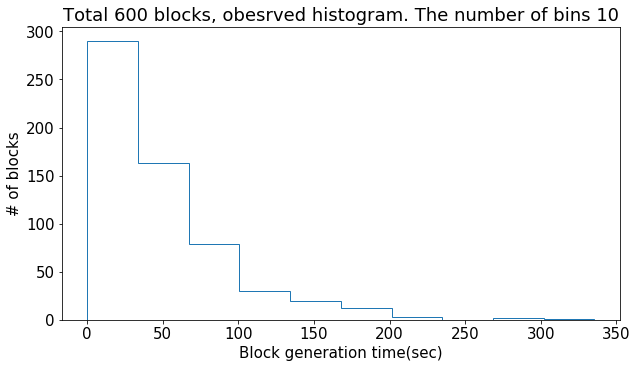

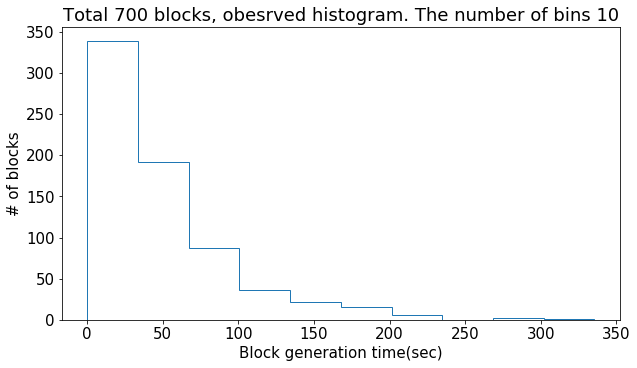

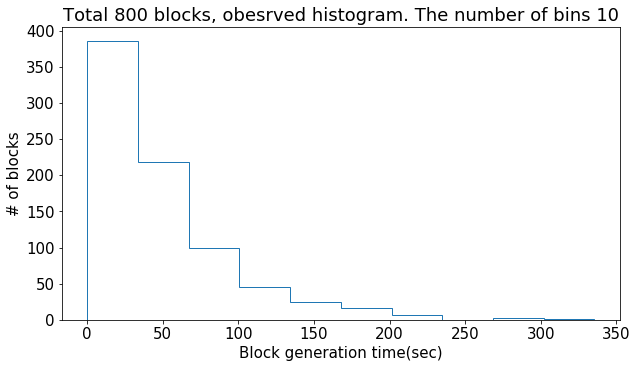

In [65]:
plt.rcParams["figure.figsize"] = (10,70)
num_of_bin = 10
histogram_val_list = []
histogram_bin_list = []
for i, val in enumerate(data_interval):
    x = df['block_height'][:val]
    frame = df['elapsed_time'][:val].astype(float)
    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)    

    ax.set_title(f"Total {val} blocks, obesrved histogram. The number of bins {num_of_bin}")
    ax.set_xlabel("Block generation time(sec)")
    ax.set_ylabel("# of blocks")
    #plt.hist(frame, bins=num_of_bin, histtype='step')    
    
    val, bins, patches = plt.hist(frame, bins=num_of_bin * (0 + 1), histtype='step', range=(0, max(frame) + min(frame)))    
    
    histogram_val_list.append(val)
    histogram_bin_list.append(bins)
    #plt.legend(loc="upper left")

In [66]:
patches[0]

&lt;matplotlib.patches.Polygon at 0x7f6d2f6b0c10&gt;

In [67]:
histogram_bin_list[0]

array([  0.        ,  30.13758334,  60.27516667,  90.41275001,
       120.55033335, 150.68791668, 180.82550002, 210.96308336,
       241.10066669, 271.23825003, 301.37583337])

In [68]:
histogram_val_list[0]

array([38., 31., 13.,  7.,  5.,  2.,  1.,  1.,  0.,  2.])

In [69]:
a = histogram_bin_list[0][1:]
b = histogram_bin_list[0][:-1]
c = a - b
print(c)
print(sum(c))
print(max(histogram_bin_list[0]))

[30.13758334 30.13758334 30.13758334 30.13758334 30.13758334 30.13758334
 30.13758334 30.13758334 30.13758334 30.13758334]
301.375833365
301.375833365


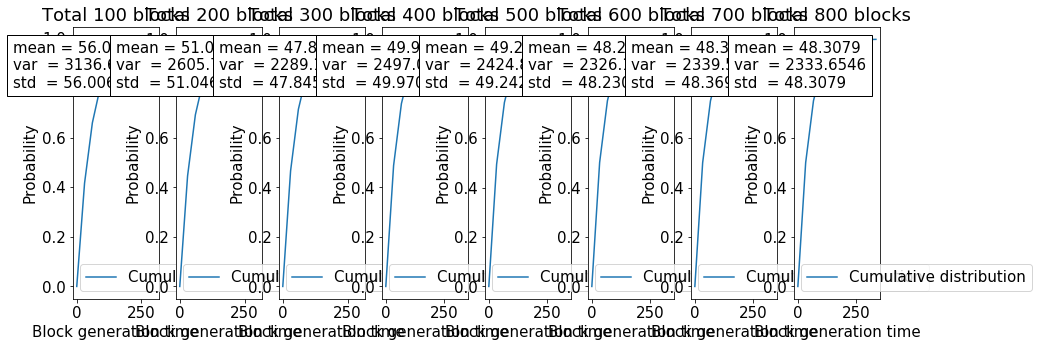

In [70]:
# Plot data
plt.rcParams["figure.figsize"] = (20,5)
cumulative_exp_distr_list = []
fig = plt.figure()

for i, val in enumerate(data_interval):  
    exp_part = np.exp(-(1/mean_list[i]) * np.array(histogram_bin_list[i]))  
    exp_distr = 1/mean_list[i] * exp_part

    cumulative_exp_distr = 1 - exp_part
    cumulative_exp_distr_list.append(cumulative_exp_distr)
    #exp_distr_frequency = (500 * (i + 1)) * exp_distr

    #ax = fig.add_subplot(11,1,i+1)            
    ax = fig.add_subplot(1, 11, i+1)            

    ax.set_title(f"Total {val} blocks")
    ax.set_xlabel("Block generation time")
    #ax.set_ylabel("# of blocks")
    ax.set_ylabel("Probability")

    #ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr, label=f"Expected histogram")
    #print(len(histogram_bin_list[i][:-1]))
    #print(len(exp_distr_histogram))
    
    #ax.plot(histogram_bin_list[i][:-1], exp_distr, label=f"Exp distribution")
    ax.plot(histogram_bin_list[i], cumulative_exp_distr, label=f"Cumulative distribution")

    #plt.hist(exp_distr_histogram, bins=num_of_bin, histtype='step')    

    textstr = '\n'.join((
        r'mean = %.4f' % (mean_list[i]),
        r'var  = %.4f' % (mean_list[i] * mean_list[i]),
        r'std  = %.4f' % (mean_list[i]))
    )    
    textbox = AnchoredText(textstr, loc=1)
    ax.add_artist(textbox)

    plt.legend(loc="top left")

In [71]:
cumulative_exp_distr_list[0]
a = np.array(cumulative_exp_distr_list[0][1:])
b = np.array(cumulative_exp_distr_list[0][:-1])
a[-1] = 1
c = a - b
c = np.append(cumulative_exp_distr_list[0][0], c)
print(c)
print(sum(c) == 1)

[0.         0.41615101 0.24296935 0.14185741 0.0828233  0.0483563
 0.02823278 0.01648368 0.00962398 0.00561895 0.00788324]
True


In [72]:
#cumulative_exp_distr_list[2]
histogram_bin_list[0]

array([  0.        ,  30.13758334,  60.27516667,  90.41275001,
       120.55033335, 150.68791668, 180.82550002, 210.96308336,
       241.10066669, 271.23825003, 301.37583337])

In [73]:
cumulative_exp_distr_list[2]

array([0.        , 0.46699771, 0.71590856, 0.84857861, 0.91929205,
       0.95698248, 0.97707156, 0.98777909, 0.99348623, 0.99652814,
       0.99814949])

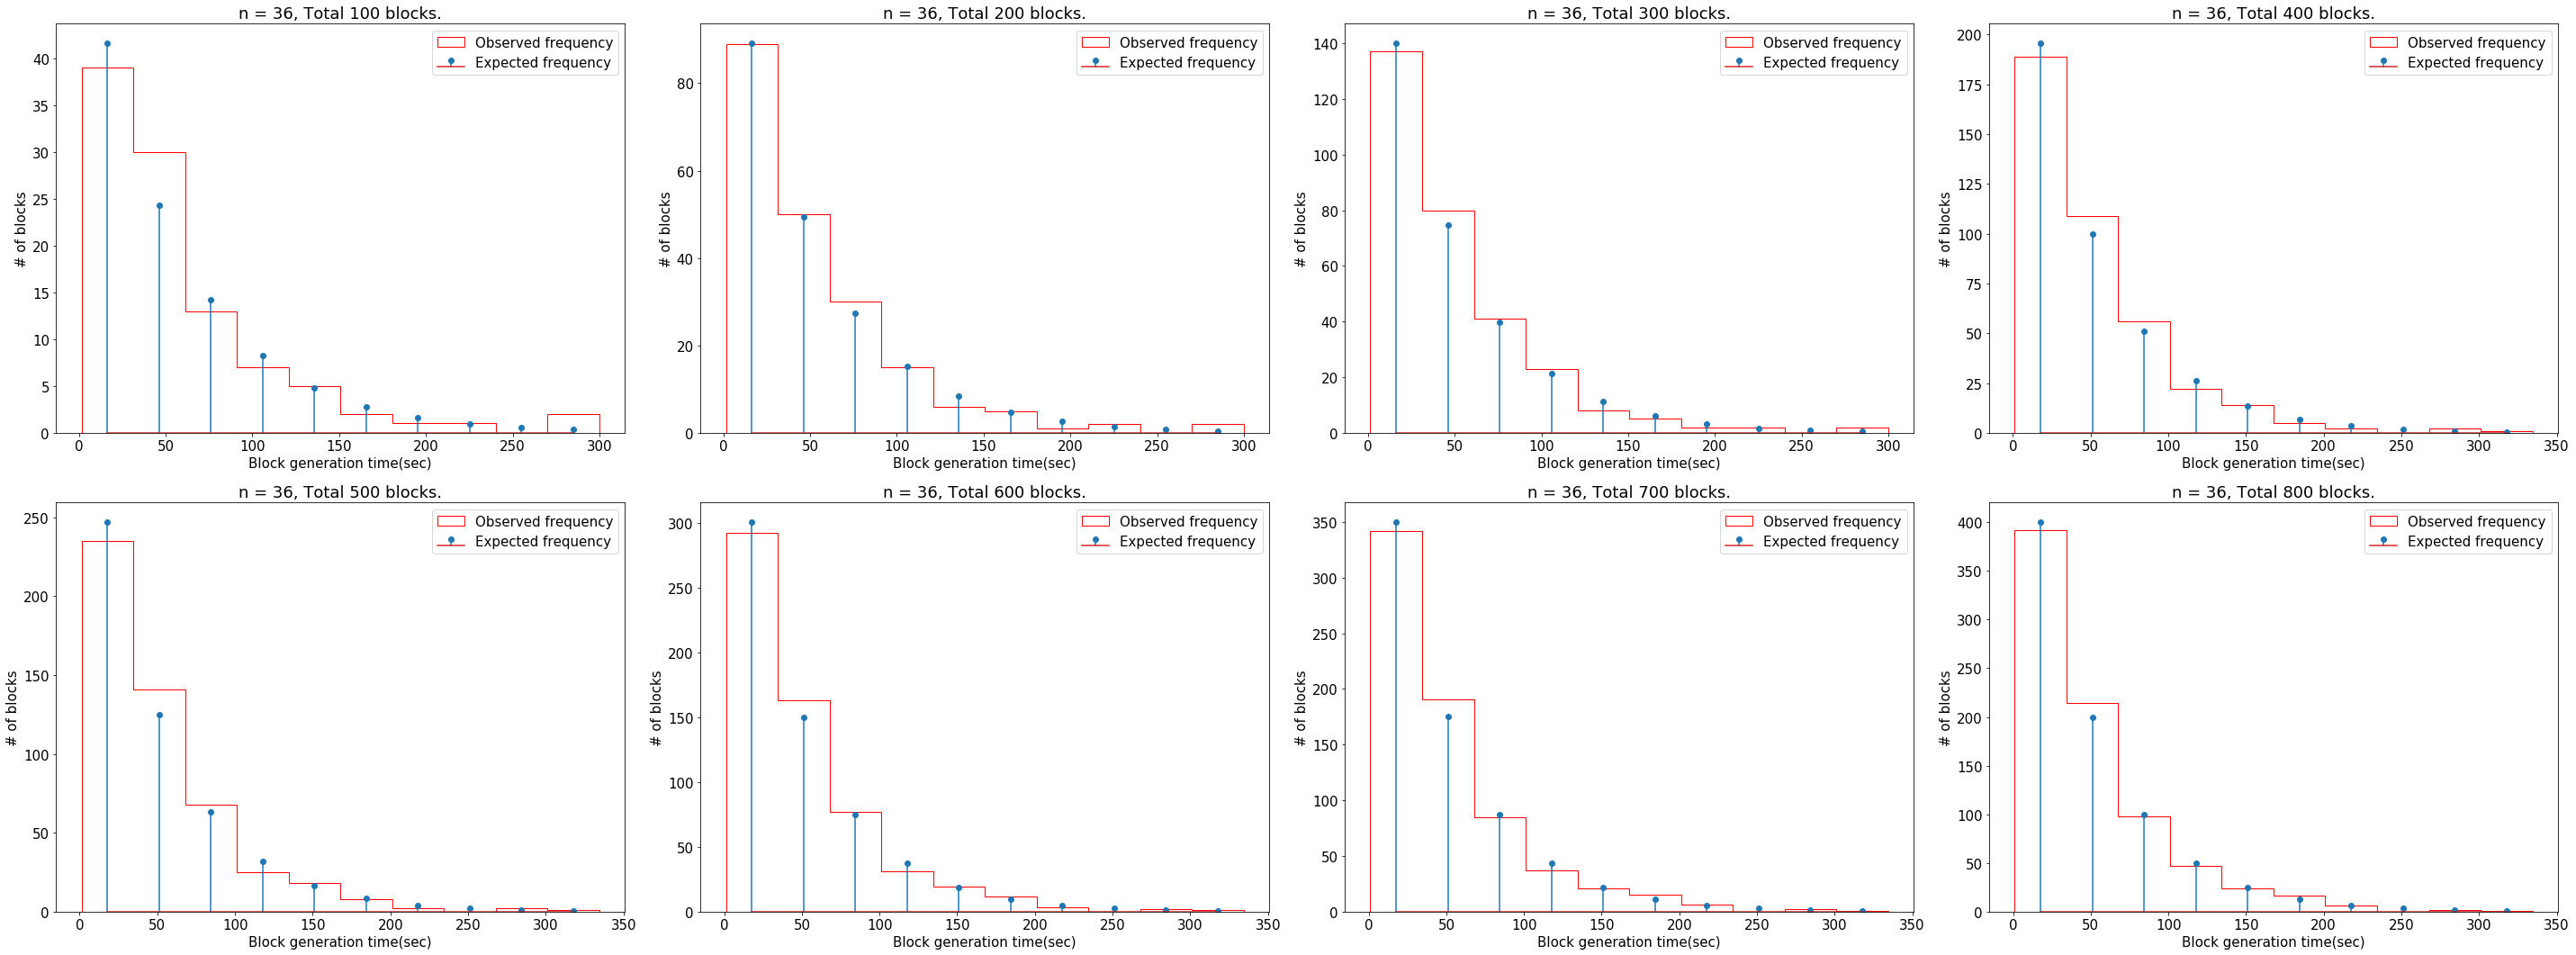

In [118]:
import matplotlib.gridspec as gridspec
plt.rcParams["figure.figsize"] = (40,15)
plt.rcParams.update({'font.size': 15})

expected_histogram_val_list = []
expected_histogram_bin_list = []
interval_val_list = []
fig = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)

for i, val in enumerate(data_interval):
    frame = df['elapsed_time'][:val].astype(float)
    cumulative_exp_distr = cumulative_exp_distr_list[i]
        
    #left_shifted = np.array(cumulative_exp_distr_list[i][1:])
    #right_shifted = np.array(cumulative_exp_distr_list[i][:-1])

    left_shifted = np.array(cumulative_exp_distr[1:])
    right_shifted = np.array(cumulative_exp_distr[:-1])
    # last interval includes [90%, inf]
    #left_shifted[-1] = 1

    interval = left_shifted - right_shifted
    #interval = np.append(right_shifted[0], interval)

    #assert sum(interval) == 1 #and len(interval) == len(cumulative_exp_distr)
    expected_freq = val * interval
    interval_val_list.append(expected_freq)

    
    ax = fig.add_subplot(spec[i//4, i%4])  
    #ax = fig.add_subplot(i//4 + 1, 4, i+1)  
    

    #ax.set_title(f"Total {val} blocks. The number of bins {num_of_bin}")
    ax.set_title(f"n = 36, Total {val} blocks.")
    ax.set_xlabel("Block generation time(sec)")
    ax.set_ylabel("# of blocks")
    #ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr, label=f"Expected histogram")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr_frequency, label=f"Expected frequency")
    
    #temp = histogram_bin_list[i] - (histogram_bin_list[i][1] - histogram_bin_list[i][0])
    #temp[0]
    #x_axis = histogram_bin_list[i][1:] - ((histogram_bin_list[i][1:] - histogram_bin_list[i][:-1]) / 2)

    #ax.stem(x_axis, expected_freq, label=f"Expected frequency")
    #ax.hist(frame, bins=num_of_bin, histtype='step', range=(0, max(frame) + min(frame)), label=f"Observed frequency", color="R", )    

    fig.tight_layout()
    val, bins, _ = ax.hist(frame, bins=num_of_bin, histtype='step', label=f"Observed frequency", color="R")    
    x_axis = bins[1:] - ((bins[1:] - bins[:-1]) / 2)
    ax.stem(x_axis, expected_freq, label=f"Expected frequency")    


    '''
    textstr = '\n'.join((
        r'mean = %.4f' % (mean_list[i]),
        r'var  = %.4f' % (mean_list[i] * mean_list[i]),
        r'std  = %.4f' % (mean_list[i]))
    )    
    textbox = AnchoredText(textstr, loc=1)
    ax.add_artist(textbox)
    '''
    plt.legend(loc="upper right")


In [61]:
print(histogram_val_list[1])
print(sum(histogram_val_list[1]))
print(interval_val_list[1])
print(sum(interval_val_list[1]))

[290. 163.  79.  30.  20.  12.   3.   0.   2.   1.]
600.0
[300.71248708 149.99915394  74.8214562   37.32187923  18.61662069
   9.28620351   4.63207459   2.3105368    1.15252469   0.57489375]
599.4278304792564


In [48]:
# 25%, 10%, 5%, 2.5%, 1%, 0.5%, 0.1%
from scipy.stats import anderson_ksamp
for i in range(len(data_interval)):
    result = anderson_ksamp([histogram_val_list[i], interval_val_list[i]])
    print(result)


Anderson_ksampResult(statistic=-1.1056682175306374, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.1907222732193286, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.12844924962133, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.1907222732193286, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.116902718331531, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.1820361279065328, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.1820361279065328, critical_values=array([0.325, 1.226, 1.961, 2

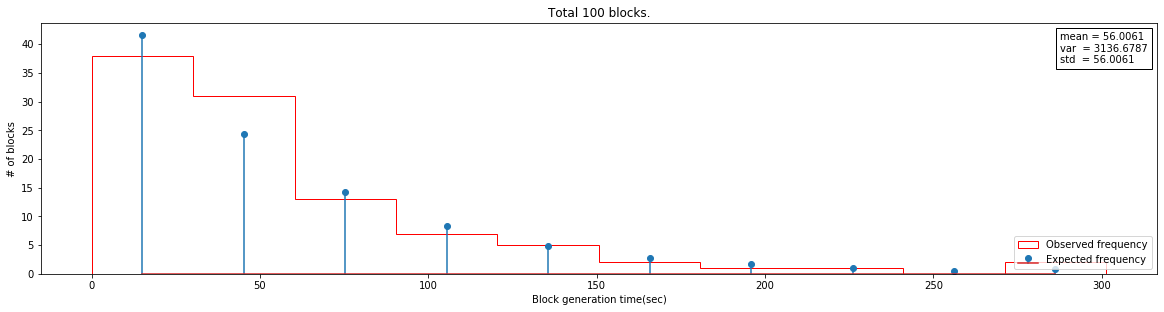

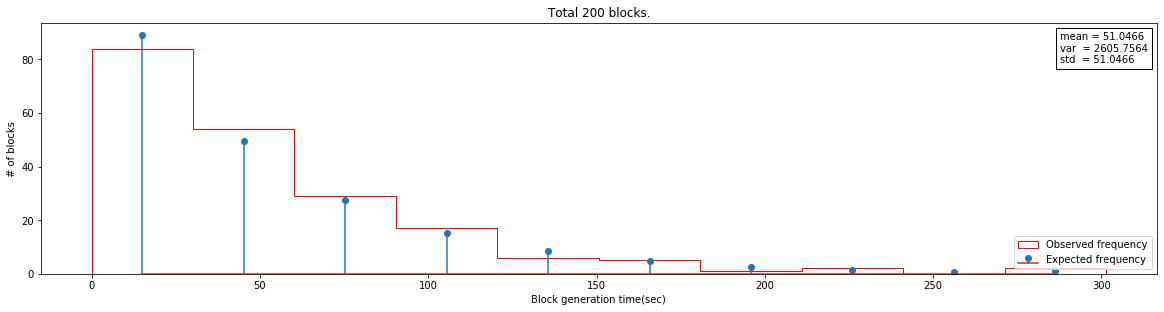

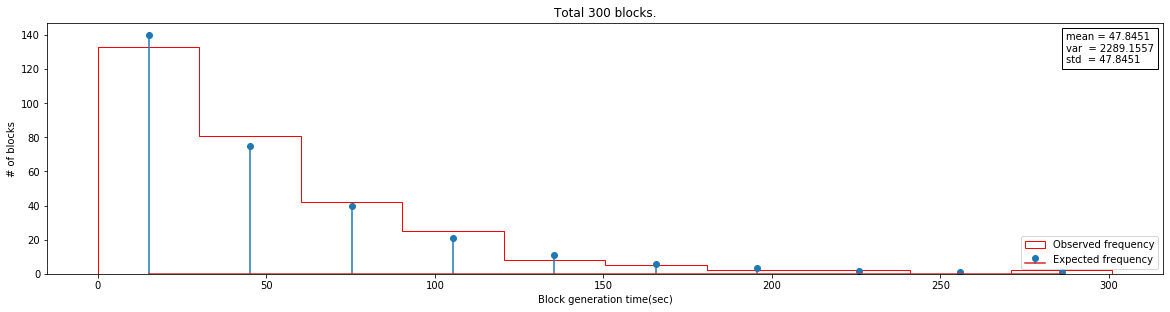

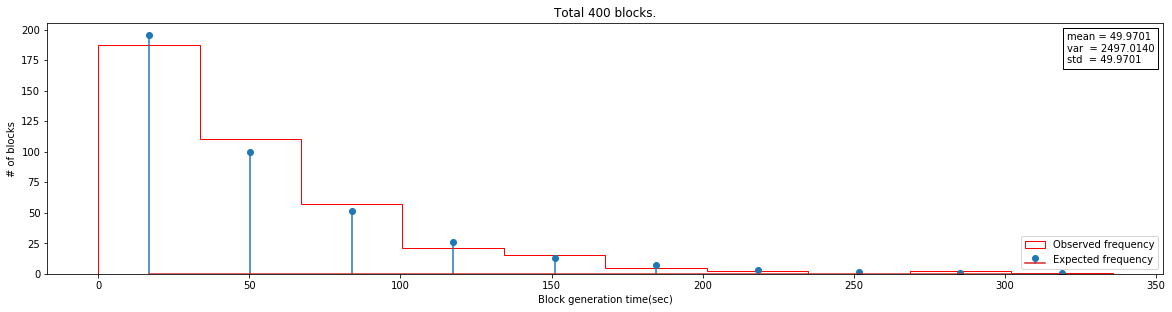

In [19]:
plt.rcParams["figure.figsize"] = (20,60)
expected_histogram_val_list = []
expected_histogram_bin_list = []
interval_val_list = []
for i, val in enumerate(data_interval):
    frame = df['elapsed_time'][:val].astype(float)
    cumulative_exp_distr = cumulative_exp_distr_list[i]
        
    #left_shifted = np.array(cumulative_exp_distr_list[i][1:])
    #right_shifted = np.array(cumulative_exp_distr_list[i][:-1])

    left_shifted = np.array(cumulative_exp_distr[1:])
    right_shifted = np.array(cumulative_exp_distr[:-1])
    # last interval includes [90%, inf]
    left_shifted[-1] = 1

    interval = left_shifted - right_shifted
    #interval = np.append(right_shifted[0], interval)

    assert sum(interval) == 1 #and len(interval) == len(cumulative_exp_distr)
    expected_freq = val * interval
    interval_val_list.append(expected_freq)

    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)            

    #ax.set_title(f"Total {val} blocks. The number of bins {num_of_bin}")
    ax.set_title(f"Total {val} blocks.")
    ax.set_xlabel("Block generation time(sec)")
    ax.set_ylabel("# of blocks")
    #ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr, label=f"Expected histogram")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr_frequency, label=f"Expected frequency")
    
    #temp = histogram_bin_list[i] - (histogram_bin_list[i][1] - histogram_bin_list[i][0])
    #temp[0]

    x_axis = histogram_bin_list[i][1:] - ((histogram_bin_list[i][1:] - histogram_bin_list[i][:-1]) / 2)
    ax.stem(x_axis, expected_freq, label=f"Expected frequency")
    ax.hist(frame, bins=num_of_bin, histtype='step', range=(0, max(frame) + min(frame)), label=f"Observed frequency", color="R", )    

    #val, bins, _ = ax.hist(frame, bins=num_of_bin, histtype='step', label=f"Observed frequency", color="R")    
    #x_axis = bins[1:] - ((bins[1:] - bins[:-1]) / 2)
    #ax.stem(x_axis, expected_freq, label=f"Expected frequency")    

    textstr = '\n'.join((
        r'mean = %.4f' % (mean_list[i]),
        r'var  = %.4f' % (mean_list[i] * mean_list[i]),
        r'std  = %.4f' % (mean_list[i]))
    )    
    textbox = AnchoredText(textstr, loc=1)
    ax.add_artist(textbox)

    plt.legend(loc="lower right")

In [20]:
print(histogram_val_list[-1])
print(interval_val_list[-1])
print(histogram_bin_list[-1])
# 마지막 부분은 무한때까지 포함하기 때문에 이전에 나왔던 예상 값보다 x값이 넓음. 따라서 더 큼

[187. 110.  57.  21.  15.   5.   2.   0.   2.   1.]
[195.63718865  99.95241469  51.06639117  26.09017816  13.32965539
   6.81021463   3.47938652   1.77764303   0.90821032   0.94871744]
[  0.          33.55832357  67.11664714 100.67497071 134.23329428
 167.79161785 201.34994143 234.908265   268.46658857 302.02491214
 335.58323571]



plt.rcParams["figure.figsize"] = (20,60)
expected_histogram_val_list = []
expected_histogram_bin_list = []
interval_val_list = []
for i, val in enumerate(data_interval):
    frame = df['elapsed_time'][:val].astype(float)
    cumulative_exp_distr = cumulative_exp_distr_list[i]
        
    #left_shifted = np.array(cumulative_exp_distr_list[i][1:])
    #right_shifted = np.array(cumulative_exp_distr_list[i][:-1])

    left_shifted = np.array(cumulative_exp_distr[1:])
    right_shifted = np.array(cumulative_exp_distr[:-1])
    # last interval includes [90%, inf]
    left_shifted[-1] = 1

    interval = left_shifted - right_shifted
    interval = np.append(right_shifted[0], interval)

    assert sum(interval) == 1 and len(interval) == len(cumulative_exp_distr)
    expected_freq = val * interval
    interval_val_list.append(expected_freq)

    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)            

    ax.set_title(f"Total {val} blocks. The number of bins {num_of_bin}")
    ax.set_xlabel("Block generation time")
    ax.set_ylabel("# of blocks")
    #ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr, label=f"Expected histogram")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr_frequency, label=f"Expected frequency")
    
    #temp = histogram_bin_list[i] - (histogram_bin_list[i][1] - histogram_bin_list[i][0])
    #temp[0]
    ax.plot(histogram_bin_list[i], expected_freq, label=f"Expected frequency")
    ax.hist(frame, bins=num_of_bin * (0 + 1), histtype='step', label=f"Observed frequency")    

    textstr = '\n'.join((
        r'mean = %.4f' % (mean_list[i]),
        r'var  = %.4f' % (mean_list[i] * mean_list[i]),
        r'std  = %.4f' % (mean_list[i]))
    )    
    textbox = AnchoredText(textstr, loc=1)
    ax.add_artist(textbox)

    plt.legend(loc="lower right")

In [21]:
print(histogram_val_list[-1])
print(interval_val_list[-1])
# 마지막 부분은 무한때까지 포함하기 때문에 이전에 나왔던 예상 값보다 x값이 넓음. 따라서 더 큼

[187. 110.  57.  21.  15.   5.   2.   0.   2.   1.]
[195.63718865  99.95241469  51.06639117  26.09017816  13.32965539
   6.81021463   3.47938652   1.77764303   0.90821032   0.94871744]


In [22]:
a = (np.array(histogram_val_list[2]) - np.array(interval_val_list[2])) ** 2
b = a / np.array(interval_val_list[2])
print(sum(b))

5.135552811035163


In [23]:
chi_square_list = []
difference_list = []
for i in range(len(data_interval)):
    square_of_difference = (np.array(histogram_val_list[i]) - np.array(interval_val_list[i])) ** 2
    chi_square = square_of_difference / np.array(interval_val_list[i])
    #chi_square_list.append(chi_square)
    difference_list.append(np.sum(chi_square))

In [24]:
difference_list

[5.387374641105719, 4.7907243768849215, 5.135552811035163, 7.486272731395198]

In [25]:
from scipy.stats import chisquare
for i in range(len(data_interval)):
    result = chisquare(histogram_val_list[i], interval_val_list[i])
    print(result)

Power_divergenceResult(statistic=5.387374641105719, pvalue=0.7993175908633257)
Power_divergenceResult(statistic=4.7907243768849215, pvalue=0.8521563936432208)
Power_divergenceResult(statistic=5.135552811035163, pvalue=0.8223352469905001)
Power_divergenceResult(statistic=7.486272731395198, pvalue=0.5866262382488422)


In [26]:
# 25%, 10%, 5%, 2.5%, 1%, 0.5%, 0.1%
from scipy.stats import anderson_ksamp
for i in range(len(data_interval)):
    result = anderson_ksamp([histogram_val_list[i], interval_val_list[i]])
    print(result)

Anderson_ksampResult(statistic=-1.1056682175306374, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.1907222732193286, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.12844924962133, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
Anderson_ksampResult(statistic=-1.1907222732193286, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)


In [27]:
# 25%, 10%, 5%, 2.5%, 1%, 0.5%, 0.1%
from scipy.stats import anderson
for i in range(len(data_interval)):
    result = anderson(histogram_val_list[i], 'expon')
    print(result)

AndersonResult(statistic=inf, critical_values=array([0.87 , 1.017, 1.265, 1.515, 1.846]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=inf, critical_values=array([0.87 , 1.017, 1.265, 1.515, 1.846]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=inf, critical_values=array([0.87 , 1.017, 1.265, 1.515, 1.846]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=inf, critical_values=array([0.87 , 1.017, 1.265, 1.515, 1.846]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [28]:
# 25%, 10%, 5%, 2.5%, 1%, 0.5%, 0.1%
from scipy.stats import ks_2samp
for i in range(len(data_interval)):
    result = ks_2samp(histogram_val_list[i], interval_val_list[i])
    print(result)

Ks_2sampResult(statistic=0.2, pvalue=0.9944575548290717)
Ks_2sampResult(statistic=0.1, pvalue=1.0)
Ks_2sampResult(statistic=0.2, pvalue=0.9944575548290717)
Ks_2sampResult(statistic=0.1, pvalue=1.0)
